In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor

In [2]:
# Configure visualization settings
# plt.style.use('seaborn-v0_8-whitegrid')
#plt.rcParams['figure.figsize'] = (12, 8)
#sns.set_palette('Set2')

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
#-----------------------CARGO DATA SET ------------------------
archivo = "C:/Users/cordo/UNIVERSIDAD/3. Metodos para el analisis de datos/Teoría/archive/student_habits_performance.csv"
df = pd.read_csv(archivo)

# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
print(df.head())
print("\nShape:", df.shape) #Con esto vemos la cantidad de filas y columnas del dataset.

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Resumen estadístico
print("\nResumen estadístico:")
print(df.describe())

# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())


'''
Notar que:  parental_education_level    909 non-null    object. O sea tenemos 91 datos faltantes en ese feature.
Hay personas que no estudian, ya que study_hours_per_day tiene como minimo 0.
'''


Primeras 5 filas del dataset:
  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6              

'\nNotar que:  parental_education_level    909 non-null    object. O sea tenemos 91 datos faltantes en ese feature.\nHay personas que no estudian, ya que study_hours_per_day tiene como minimo 0.\n'


Student Habits Dataset Summary:
Shape: (1000, 16)

Data types:
student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

Valores Faltantes (cantidad): 
student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job     

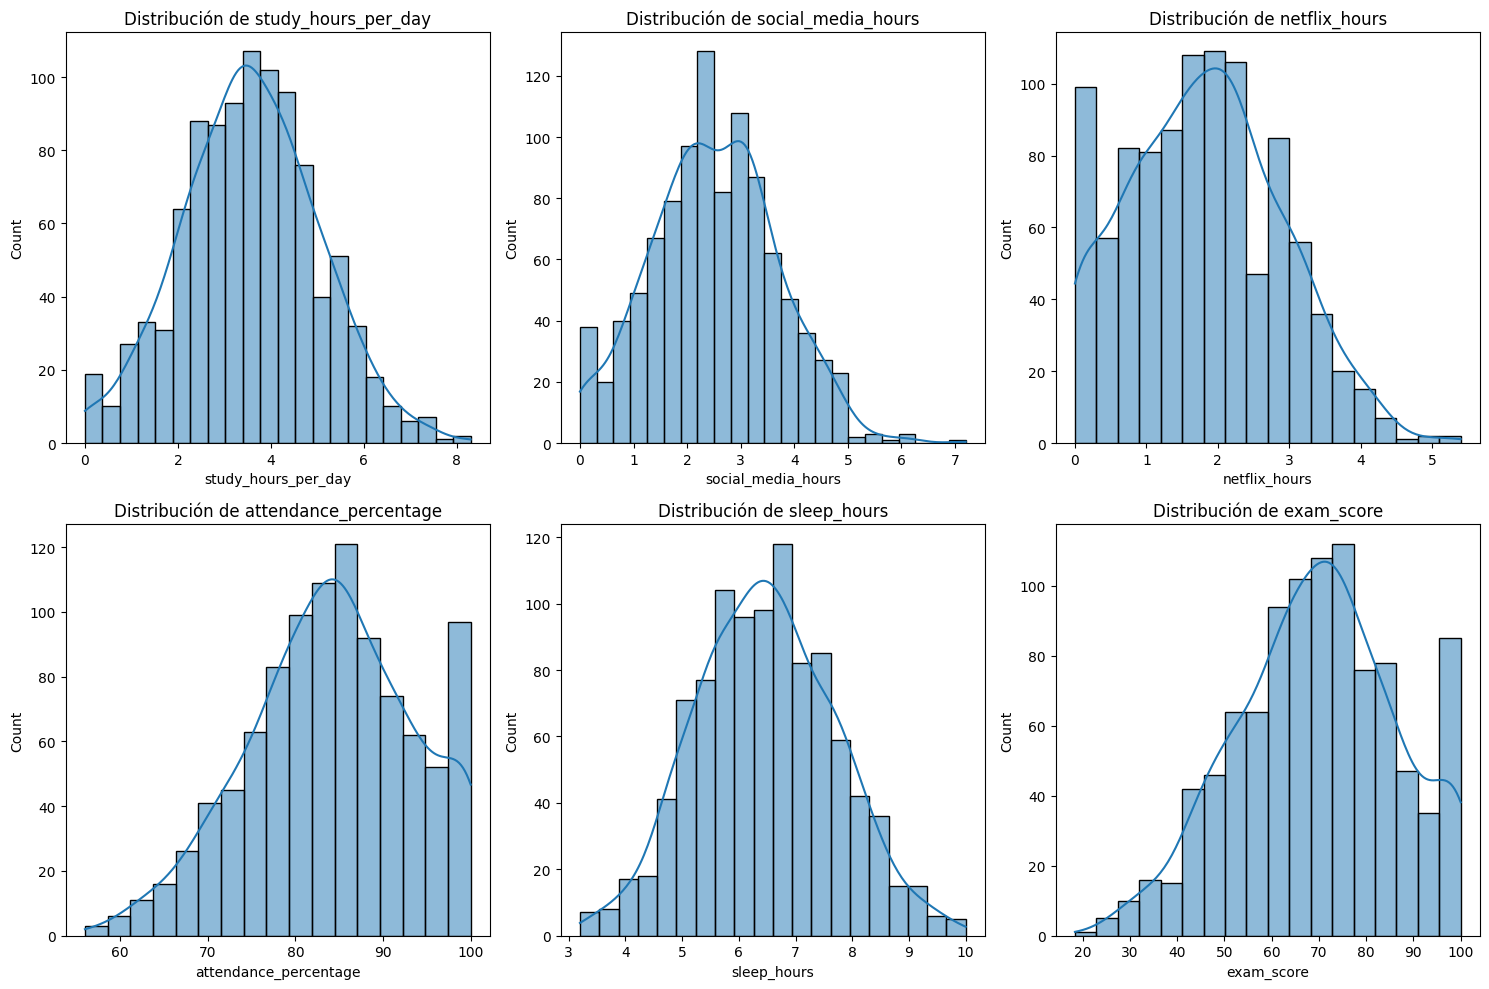

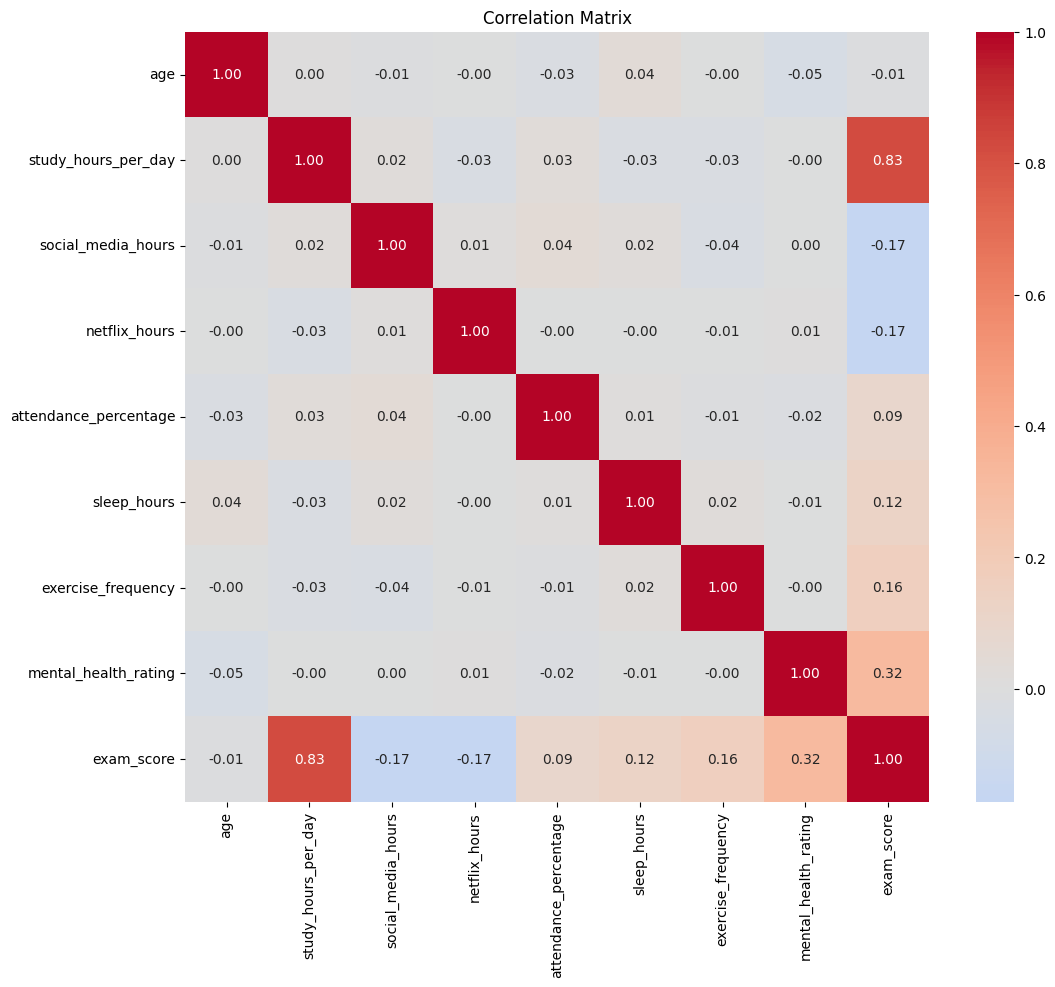

In [13]:
# -------------------------------------------------------------------------
# 1. INTRODUCTION TO PREPROCESSING
# -------------------------------------------------------------------------
 

# Función para explorar el dataset
def explore_dataset(df, title):
    print(f"\n{title} Dataset Summary:")
    print("Shape:", df.shape)
    print("\nData types:")
    print(df.dtypes)
    print("\nValores Faltantes (cantidad): ")
    print(df.isnull().sum())
    print("\nValores faltantes en porcentaje: ")
    print((df.isnull().sum() / len(df) * 100).round(2))
    print("\nDescriptive statistics:")
    print(df.describe().T)  #método de pandas que genera estadísticas descriptivas resumidas para cada columna numérica del DataFrame. la T hace que se transponga

    #Visualizamos los histogramas
    plt.figure(figsize=(15, 10))
    numeric_cols = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 
                    'attendance_percentage','sleep_hours', 'exam_score']
    # Ajustar la cuadrícula para 9 columnas: 2 filas x 3 columnas
    for i, col in enumerate(numeric_cols):
        plt.subplot(2, 3, i+1) 
        sns.histplot(df[col], kde=True)  #agrega una curva de estimación de densidad (Kernel Density Estimate) sobre el histograma para ver la forma suave de la distribución.
        plt.title(f'Distribución de {col}')
    plt.tight_layout()

    # Correlation matrix
    plt.figure(figsize=(12, 10))
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Matrix')

#Ejecutar la funcion para explorar el dataset
explore_dataset(df, "Student Habits")

In [5]:
#------------------------Completamos valores faltantes------------------------
data_mode = df.copy()


print("Valores nulos antes:", data_mode['parental_education_level'].isnull().sum()) #cuántos valores nulos tiene la columna parental_education_level
data_mode['parental_education_level'].fillna(data_mode['parental_education_level'].mode()[0], inplace=True) #Completamos los valores nulos en la columna parental_education_level con la moda de la columna
print("Valores nulos después:", data_mode['parental_education_level'].isnull().sum())

Valores nulos antes: 91
Valores nulos después: 0


In [ ]:
#-------------------------------------MEJOR ELIMINO DATOS-------------------------------------
data_full= df.copy()

# Verificar nulos antes
print("Valores nulos antes:")
print(data_full.isnull().sum())

# Eliminar filas con valores nulos
data_full = data_full.dropna()

# Verificar nulos después
print("\nValores nulos después:")
print(data_full.isnull().sum())

# Verificar el nuevo tamaño del dataset
print("\nNuevo tamaño del dataset:", data_full.shape)

Valores nulos antes:
student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

Valores nulos después:
student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequen

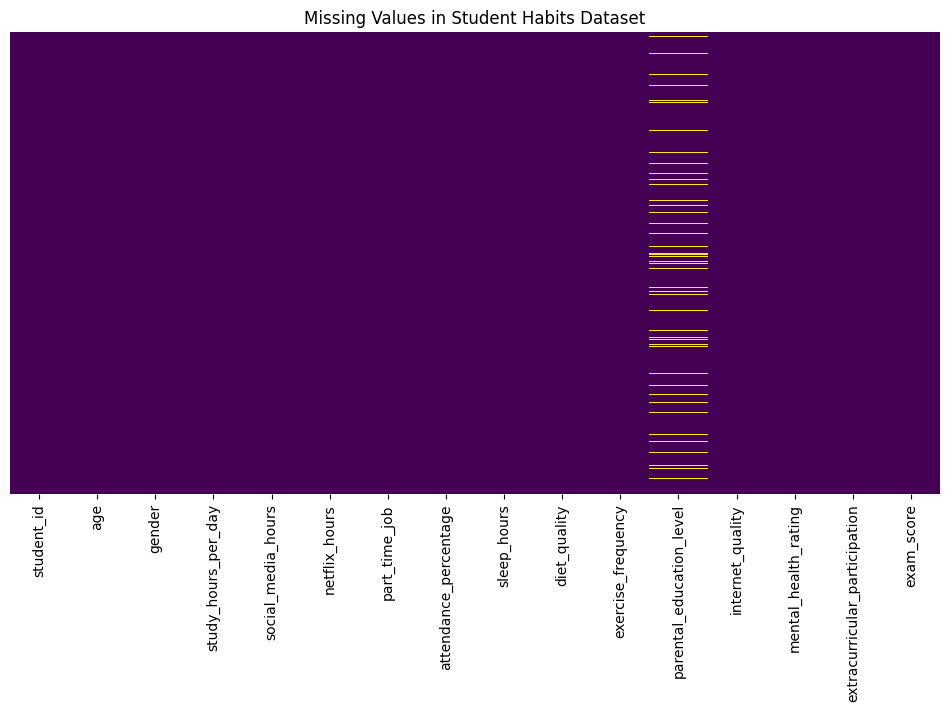

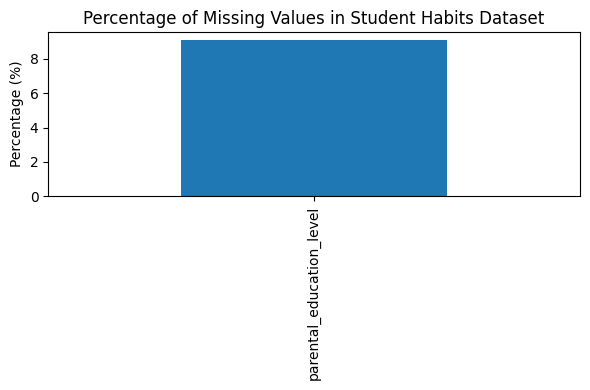

Original shape: (1000, 16)
Shape after dropping rows with NaN: (909, 16)
Columns dropped due to high missing percentage: []
Shape after dropping high-missing columns: (1000, 16)


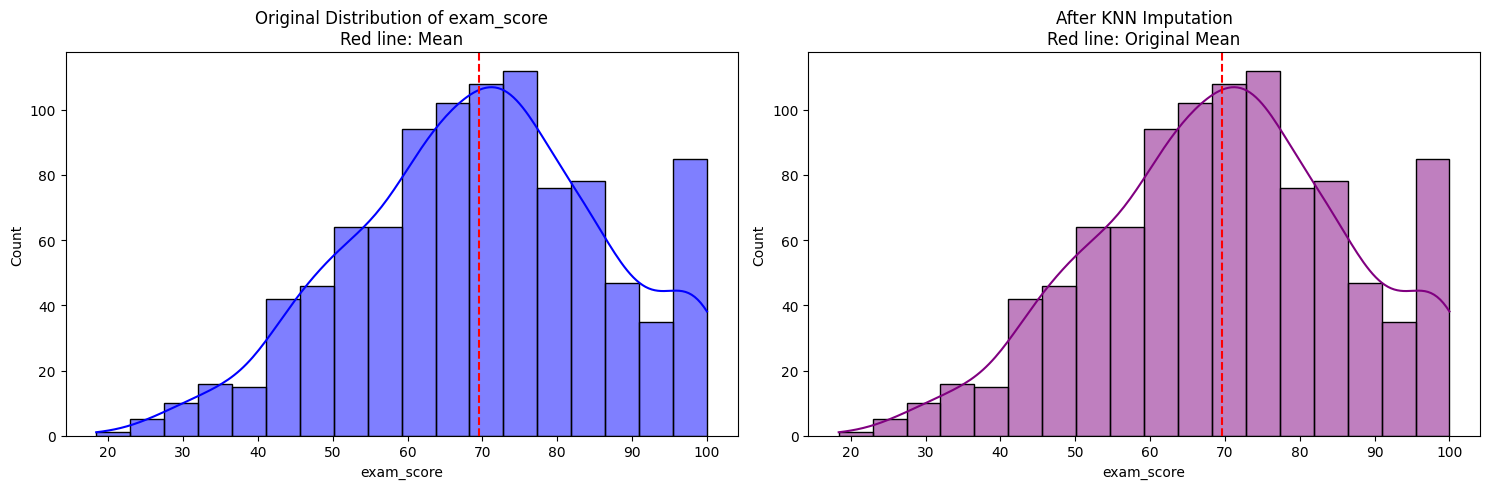

Dataset with missingness indicators:
  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6       

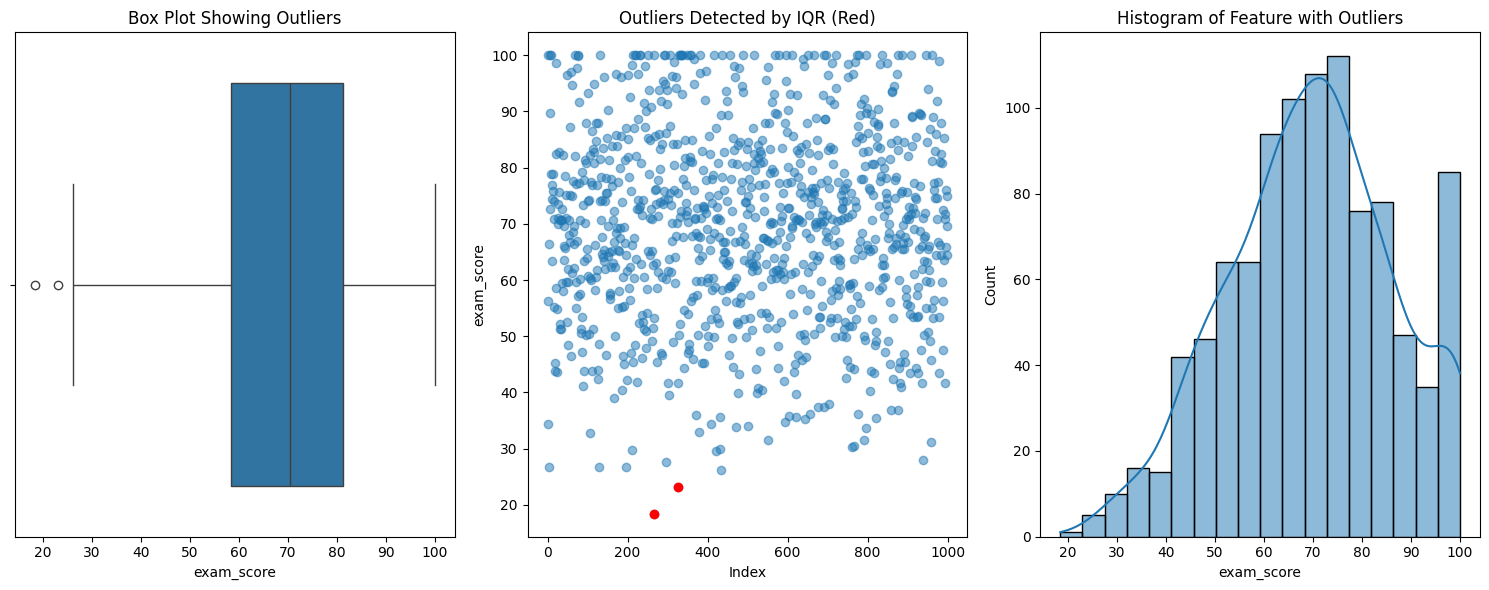

Original DataFrame shape: (1000, 16)
DataFrame shape after removing outliers (IQR): (998, 16)


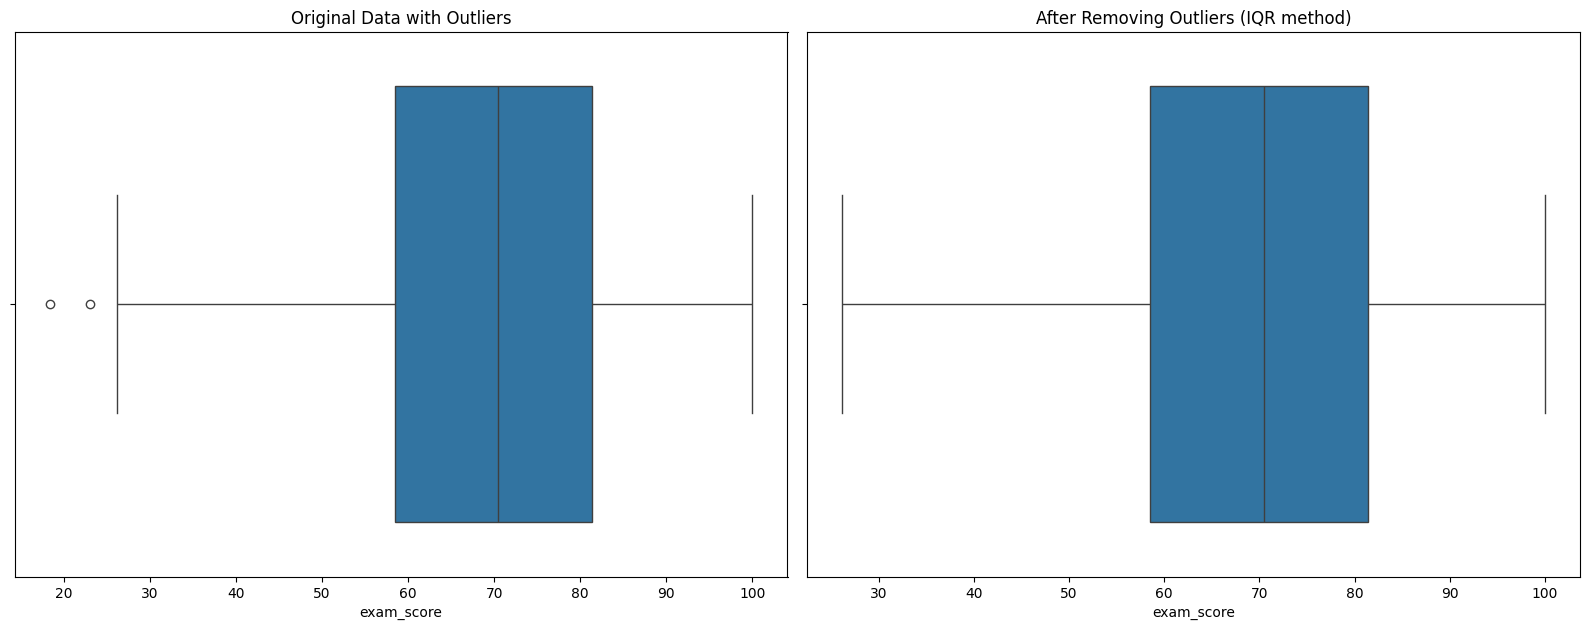

In [ ]:
# -------------------------------------------------------------------------
# 2. STRATEGIES FOR INCOMPLETE AND INCORRECT DATA
# -------------------------------------------------------------------------

# 2.1 Detecting and visualizing missing values
def visualize_missing_values(df, title):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title(f'Missing Values in {title} Dataset')
    plt.show()

    missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    missing_percentage = missing_percentage[missing_percentage > 0]

    plt.figure(figsize=(6, 4))
    missing_percentage.plot(kind='bar')
    plt.title(f'Percentage of Missing Values in {title} Dataset')
    plt.ylabel('Percentage (%)')
    plt.tight_layout()
    plt.show()

# Visualizar valores faltantes
visualize_missing_values(df, "Student Habits")

# 2.2 Handling missing values
# Crear una copia para no modificar el original
df_missing = df.copy()

# Method 1: Dropping rows with missing values
df_dropped = df_missing.dropna()
print("Original shape:", df_missing.shape)
print("Shape after dropping rows with NaN:", df_dropped.shape)

# Method 2: Dropping columns with high percentage of missing values
threshold = 0.1  # 10% threshold
columns_to_drop = [col for col in df_missing.columns 
                   if df_missing[col].isnull().mean() > threshold]
df_dropped_cols = df_missing.drop(columns=columns_to_drop)
print("Columns dropped due to high missing percentage:", columns_to_drop)
print("Shape after dropping high-missing columns:", df_dropped_cols.shape)

# Method 3: Simple imputation (mode for categorical)
# Para parental_education_level (categórica)
imputer_mode = SimpleImputer(strategy='most_frequent')
df_missing_cat = df_missing[['parental_education_level']]  # Solo la columna categórica con nulos
cat_cols = df_missing_cat.columns
df_imputed_mode = pd.DataFrame(
    imputer_mode.fit_transform(df_missing_cat),
    columns=cat_cols
)

# Method 4: Advanced imputation (KNN) - No aplica directamente a categóricas
# Para columnas numéricas (como ejemplo, usemos exam_score sin nulos)
imputer_knn = KNNImputer(n_neighbors=5)
df_missing_numeric = df_missing.select_dtypes(include=['float64', 'int64'])
numeric_cols = df_missing_numeric.columns
df_imputed_knn = pd.DataFrame(
    imputer_knn.fit_transform(df_missing_numeric),
    columns=numeric_cols
)

# Comparar distribuciones (solo para numéricas, no aplica a parental_education_level)
# Usemos exam_score como ejemplo
missing_col = 'exam_score'  # Nota: exam_score no tiene nulos, esto es ilustrativo
original_values = df_missing_numeric[missing_col]
imputed_knn_values = df_imputed_knn[missing_col]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(original_values, kde=True, color='blue')
plt.axvline(original_values.mean(), color='red', linestyle='--')
plt.title(f'Original Distribution of {missing_col}\nRed line: Mean')

plt.subplot(1, 2, 2)
sns.histplot(imputed_knn_values, kde=True, color='purple')
plt.axvline(original_values.mean(), color='red', linestyle='--')
plt.title(f'After KNN Imputation\nRed line: Original Mean')
plt.tight_layout()
plt.show()

# Method 5: Creating missingness indicators
df_with_indicators = df_missing.copy()
if df_missing['parental_education_level'].isnull().any():
    df_with_indicators['parental_education_level_missing'] = df_missing['parental_education_level'].isnull().astype(int)

print("Dataset with missingness indicators:")
print(df_with_indicators.head())

# 2.3 Detecting and handling outliers
# Usemos exam_score como columna para detectar outliers
column_with_outliers = 'exam_score'

# Method 1: Z-score
z_scores = stats.zscore(df[column_with_outliers].dropna())
outliers_z = np.abs(z_scores) > 3
print(f"Number of outliers detected by Z-score (abs(z) > 3): {np.sum(outliers_z)}")

# Method 2: IQR
Q1 = df[column_with_outliers].quantile(0.25)
Q3 = df[column_with_outliers].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[column_with_outliers] < (Q1 - 1.5 * IQR)) |
                (df[column_with_outliers] > (Q3 + 1.5 * IQR)))
print(f"Number of outliers detected by IQR method: {np.sum(outliers_iqr)}")

# Method 3: Local Outlier Factor (LOF)
lof_data = df[[column_with_outliers]].dropna()
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outliers_lof = lof.fit_predict(lof_data) == -1
print(f"Number of outliers detected by LOF: {np.sum(outliers_lof)}")

# Visualizing outliers with box plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=df[column_with_outliers])
plt.title('Box Plot Showing Outliers')

plt.subplot(1, 3, 2)
plt.scatter(range(len(df)), df[column_with_outliers], alpha=0.5)
outlier_idx_iqr = np.where(outliers_iqr)[0]
plt.scatter(outlier_idx_iqr, df.loc[outlier_idx_iqr, column_with_outliers], color='red')
plt.title('Outliers Detected by IQR (Red)')
plt.xlabel('Index')
plt.ylabel(column_with_outliers)

plt.subplot(1, 3, 3)
sns.histplot(df[column_with_outliers], kde=True)
plt.title('Histogram of Feature with Outliers')

plt.tight_layout()
plt.show()

# Methods for handling outliers
# Method 1: Removing outliers
df_no_outliers_iqr = df[~outliers_iqr]
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers (IQR): {df_no_outliers_iqr.shape}")

# Compare original vs. handled outliers
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x=df[column_with_outliers])
plt.title('Original Data with Outliers')

plt.subplot(2, 2, 2)
sns.boxplot(x=df_no_outliers_iqr[column_with_outliers])
plt.title('After Removing Outliers (IQR method)')

plt.tight_layout()
plt.show()